---
# Diabetes.csv (Data Cleaning)
### Importing libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---
## Checking the number of 0s in Columns 1 to 6

In [6]:
columns = list(data)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
(data[columns[1:6]]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

---
## Replacing 0s with NaNs (NULL values)
### So that we can drop these NULL values later on

In [9]:
data[columns[1:6]] = data[columns[1:6]].replace(0,np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

---
## Glucose (Column 1) has lower number of NaN values that can be replaced  

In [10]:
display(data[columns[1:2]])
data[columns[1]].isnull().sum()

,Glucose
0,148.0
1,85.0
2,183.0
3,89.0
4,137.0
...,...
763,101.0
764,122.0
765,121.0
766,126.0


np.int64(5)

---
## Histogram of Glucose

<Axes: xlabel='Glucose', ylabel='Count'>

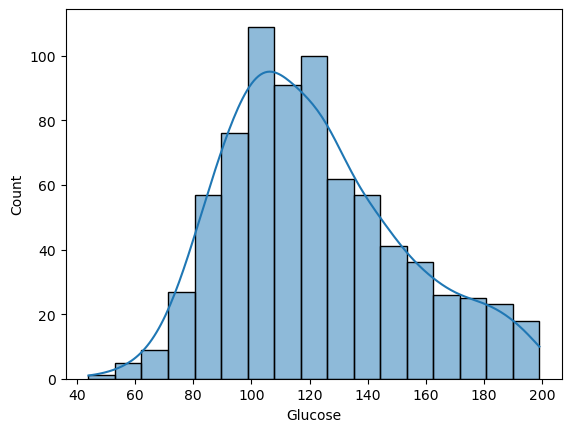

In [11]:
sns.histplot(data[columns[1]], kde=True)

### The KDE line shows that it's a Normal Distribution with a slightly positive skew
#### So, we can replace the NaNs with Mean of the Glucose column (Mean Imputation)

In [12]:
glucose_mean = data[columns[1]].mean()
print(glucose_mean)
data.fillna({columns[1]: glucose_mean}, inplace=True)

121.6867627785059


### Glucose column after Mean Imputation

In [13]:
data[columns[1]].isnull().sum()

np.int64(0)

<Axes: xlabel='Glucose', ylabel='Count'>

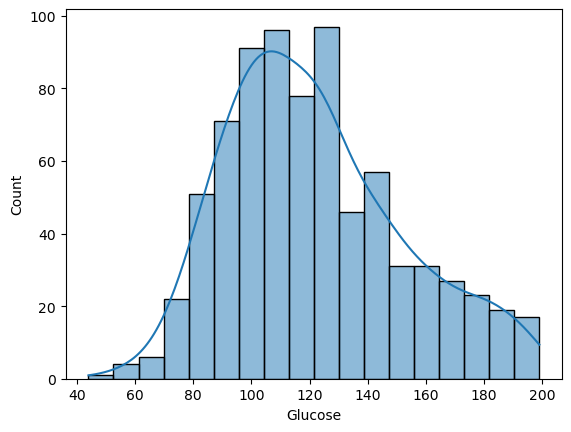

In [14]:
sns.histplot(data[columns[1]], kde=True)

---
## BMI (Column 5) has fairly small number of NaN values aswell 

In [15]:
display(data[columns[5:6]])
data[columns[5]].isnull().sum()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


np.int64(11)

### Histogram of BMI

<Axes: xlabel='BMI', ylabel='Count'>

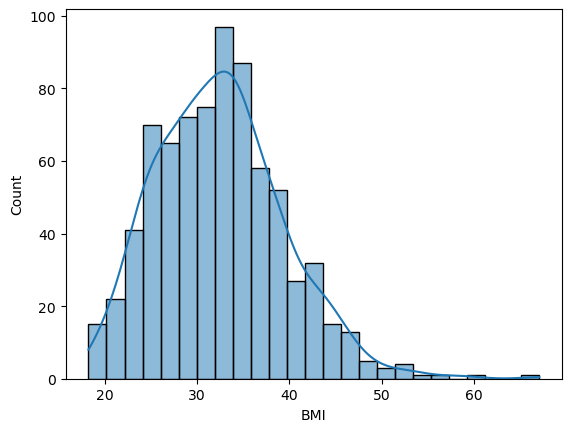

In [16]:
sns.histplot(data[columns[5]], kde=True)

### KDE line shows Normal distribution with slight left skew
#### Mean, Median and Mode are all fairly identical, so we can try Median Imputation

In [17]:
bmi_mean = data[columns[5]].mean()
bmi_median = data[columns[5]].median()
bmi_mode = data[columns[5]].mode()
print(f"BMI Mean: {bmi_mean}, BMI Median: {bmi_median}, BMI Mode: {bmi_mode}") 
# Mean = Median = Mode | So, ALMOST normal dsitribution

data.fillna({columns[5] : bmi_median}, inplace=True)
print(data[columns[5]].isnull().sum())

BMI Mean: 32.457463672391015, BMI Median: 32.3, BMI Mode: 0    32.0
Name: BMI, dtype: float64
0


### Histogram column after Median Imputation

<Axes: xlabel='BMI', ylabel='Count'>

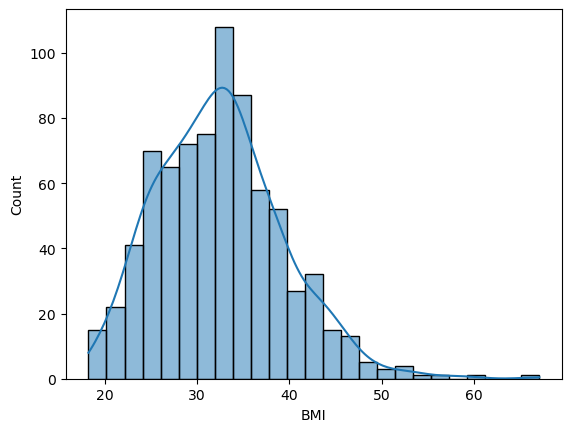

In [18]:
sns.histplot(data[columns[5]], kde=True)

---
## Rest of the columns have huge number of NaNs
#### So, its better to drop these columns so that they don't mess with our distribution

In [19]:
data[columns[1:6]].isnull().sum()

Glucose            0
BloodPressure     35
SkinThickness    227
Insulin          374
BMI                0
dtype: int64

In [20]:
data = data.dropna(subset=columns[1:6])
data[columns[1:6]].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

---
## Diabetes.csv dataset after Cleaning NULLs and Dropping all NaNs

In [21]:
data[columns[1:6]]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
6,78.0,50.0,32.0,88.0,31.0
8,197.0,70.0,45.0,543.0,30.5
13,189.0,60.0,23.0,846.0,30.1
...,...,...,...,...,...
753,181.0,88.0,44.0,510.0,43.3
755,128.0,88.0,39.0,110.0,36.5
760,88.0,58.0,26.0,16.0,28.4
763,101.0,76.0,48.0,180.0,32.9


In [22]:
data.reset_index(drop=True, inplace=True)
data[columns]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
389,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
390,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
391,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
392,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
